In [4]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:

ACCESS_TOKEN = 'c13c14e2c13c14e2c13c14e2f8c210dd90cc13cc13c14e2a6ea87178afd29ceaf815e1d'
GROUP_ID = 'rhymes'
API_VERSION = '5.199'

url = 'https://api.vk.com/method/groups.getMembers'

# Сначала узнаем общее число подписчиков
params_count = {
    'group_id': GROUP_ID,
    'access_token': ACCESS_TOKEN,
    'v': API_VERSION,
    'count': 1
}
response = requests.get(url, params=params_count).json()
total_count = response['response']['count']
print(f"Всего подписчиков: {total_count}")

# Теперь собираем всех
all_users = []

for offset in range(0, 100000, 1000):
    params = {
        'group_id': GROUP_ID,
        'fields': 'sex,bdate,city,universities',
        'access_token': ACCESS_TOKEN,
        'v': API_VERSION,
        'count': 1000,
        'offset': offset
    }

    response = requests.get(url, params=params).json()
    if 'response' in response:
        users = response['response']['items']
        all_users.extend(users)
        print(f"Собрано: {len(all_users)} пользователей")
    else:
        print(f"Ошибка на offset {offset}: {response}")
        break

    time.sleep(0.2)

# DataFrame и сохранение
df = pd.DataFrame(all_users)
df.to_csv('vk_users.csv', index=False)
print("✅ Всё выгружено и сохранено в vk_users.csv")


KeyError: 'response'

In [ ]:
df

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated,universities
0,19,12.12,"{'id': 2, 'title': 'Saint Petersburg'}",1,Svetochek,Alenky,True,False,NaN,NaN
1,177,23.4,"{'id': 1, 'title': 'Moscow'}",1,Ekaterina,Abramenko,True,False,NaN,NaN
2,485,NaN,"{'id': 1, 'title': 'Moscow'}",1,Darya,Pavlova,True,False,banned,NaN
3,997,17.2,NaN,2,Alexey,Chernyshev,True,False,NaN,NaN
4,1011,1.10,"{'id': 2, 'title': 'Saint Petersburg'}",2,Maxim,Petrenchuk,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99995,37773518,8.7,"{'id': 290, 'title': 'Kurchatov'}",2,Seryoga,Durnev,False,True,NaN,NaN
99996,37774306,NaN,"{'id': 42, 'title': 'Voronezh'}",2,Evgeny,Arzamastsev,False,True,NaN,NaN
99997,37775950,NaN,"{'id': 314, 'title': 'Kyiv'}",2,Vova,Verteyko,True,False,NaN,NaN
99998,37776050,NaN,"{'id': 1297, 'title': 'Schelkovo'}",2,Emirkhan,Kaibov,False,True,NaN,NaN


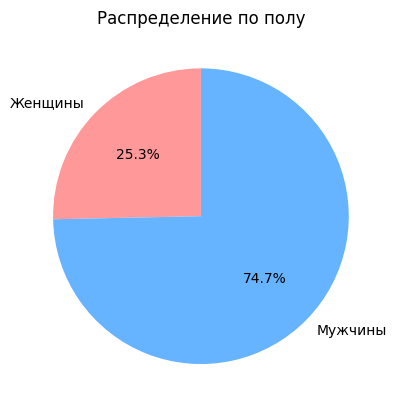

In [ ]:
# Оставляем только sex = 1 или 2
df_filtered = df[df['sex'].isin([1, 2])]

# Считаем
sex_counts = df_filtered['sex'].value_counts().sort_index()  # 1, 2

# Подписи в нужном порядке
labels = ['Женщины', 'Мужчины']
colors = ['#ff9999', '#66b3ff']

# Рисуем
sex_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Распределение по полу')
plt.ylabel('')
plt.show()


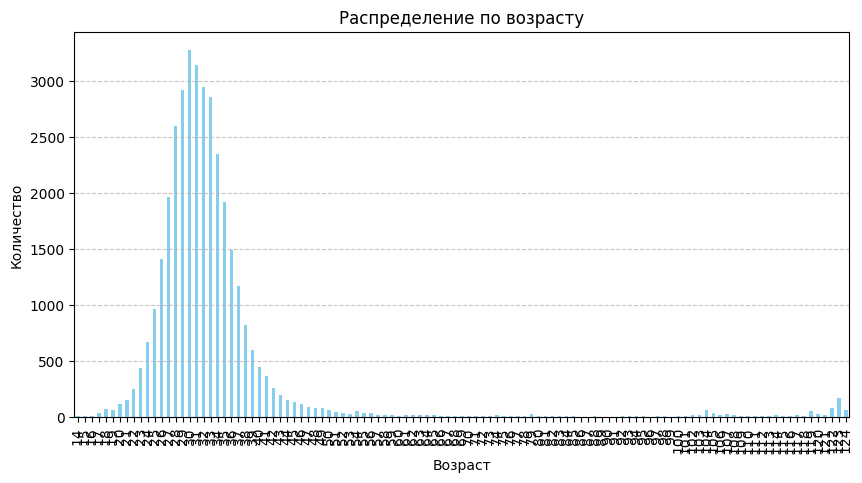

In [ ]:
from datetime import datetime

# Функция для расчёта возраста
def get_age(bdate):
    try:
        parts = bdate.split('.')
        if len(parts) == 3:  # только если есть год
            birth_date = datetime.strptime(bdate, "%d.%m.%Y")
            today = datetime.today()
            age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
            return age
    except:
        return None

# Применяем
df['age'] = df['bdate'].apply(get_age)
ages = df['age'].dropna().astype(int)

# Группировка по возрастам
age_counts = ages.value_counts().sort_index()

# Рисуем график
plt.figure(figsize=(10,5))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
age_counts.sort_values(ascending=False)

age
30    3271
31    3143
32    2943
29    2920
33    2853
      ... 
91       4
86       4
90       4
89       4
87       4
Name: count, Length: 111, dtype: int64

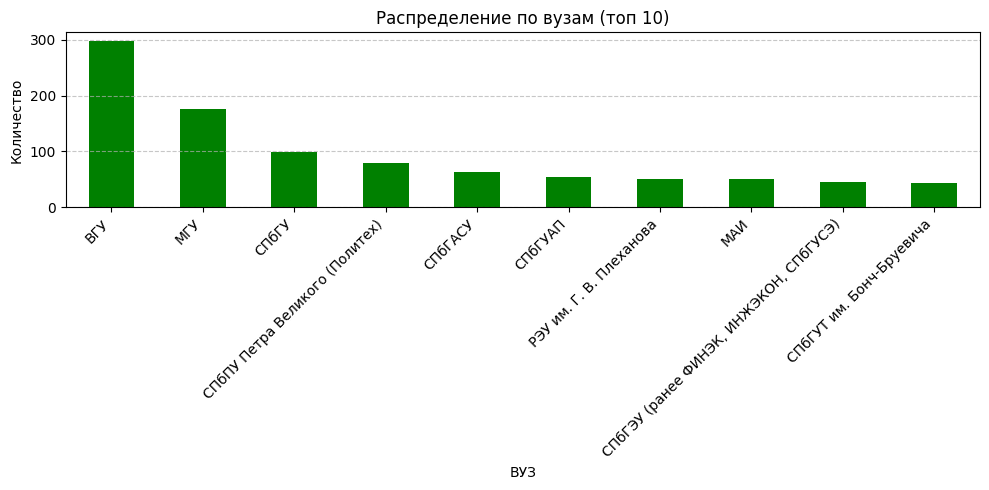

In [ ]:
# Функция: достаём вуз
def get_university(unis):
    if isinstance(unis, list) and len(unis) > 0:
        return unis[0].get('name')
    return None

df['university'] = df['universities'].apply(get_university)

# Считаем частоты вузов
uni_counts = df['university'].value_counts().head(10)  # Топ-10

# График
plt.figure(figsize=(10,5))
uni_counts.plot(kind='bar', color='green')
plt.title('Распределение по вузам (топ 10)')
plt.xlabel('ВУЗ')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()